# Testing the `FornaxModel` Subclass

In [1]:
import os

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table, hstack, vstack

from scipy.optimize import minimize

import photospline
from photospline import glam_fit, ndsparse, bspline, SplineTable

from snewpy.models import FornaxModel, Flavor

In [2]:
model = FornaxModel(15)

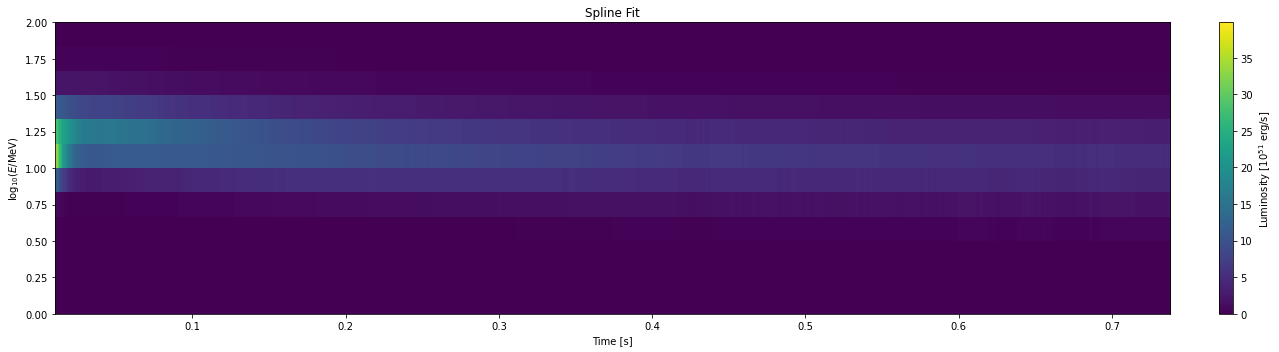

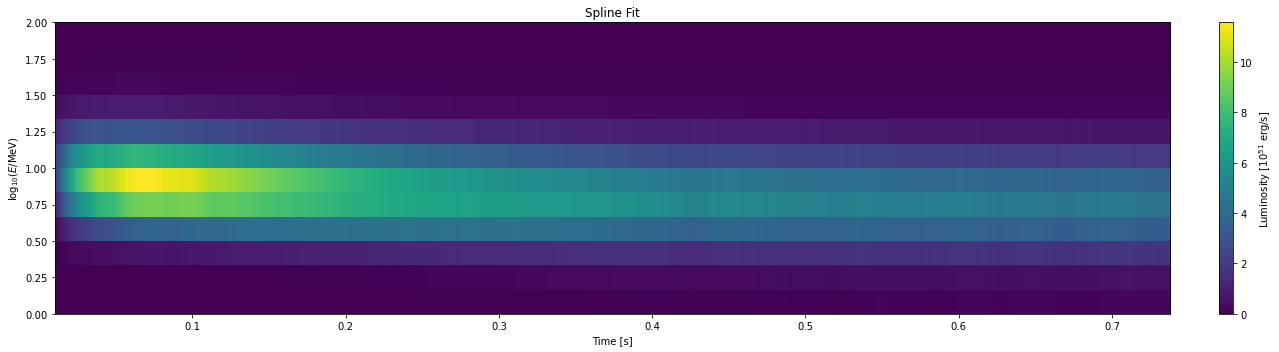

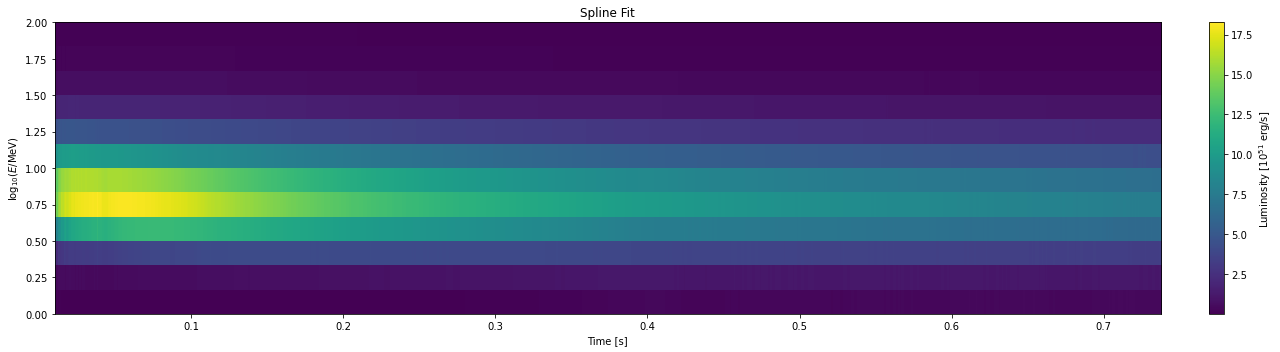

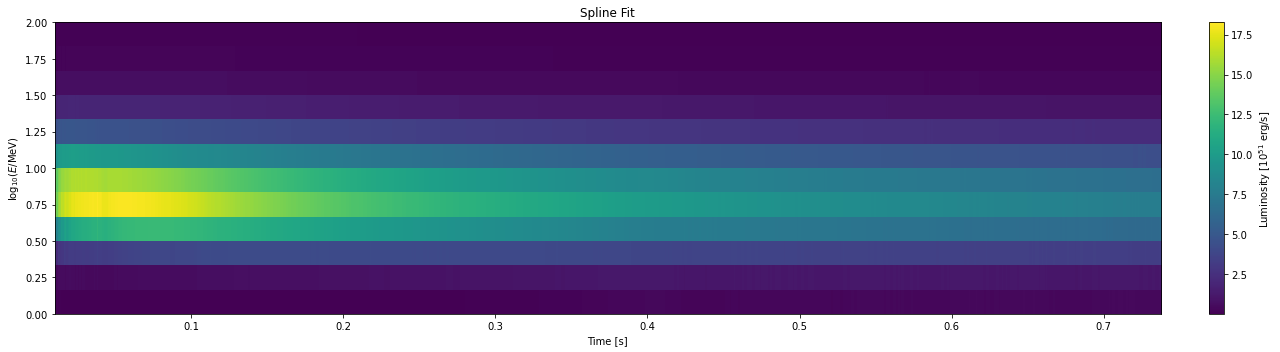

In [3]:
for flavor in Flavor:
    t = model.time
    logE = np.linspace(0, 2, 13)
    
    # Plotting the full luminosity array, spline fit, and residual
    fig, ax = plt.subplots(1,1, figsize=(18,5))

    im = ax.imshow(model.luminosity[flavor.name], aspect='auto', interpolation='nearest', extent=(t[0],t[-1], logE[0],logE[-1]))
    cb = fig.colorbar(im, ax = ax, fraction=0.046, pad=0.04)
    cb.set_label('Luminosity [$10^{51}$ erg/s]')
    ax.set(xlabel='Time [s]',
           ylabel='$\log_{10}{(E/\mathrm{MeV})}$', 
           title = 'Spline Fit')
    fig.tight_layout();

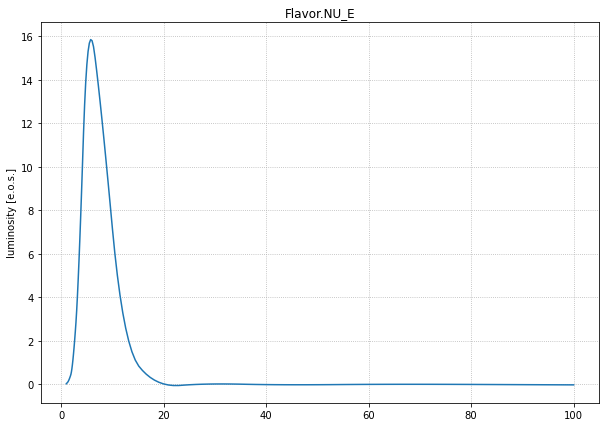

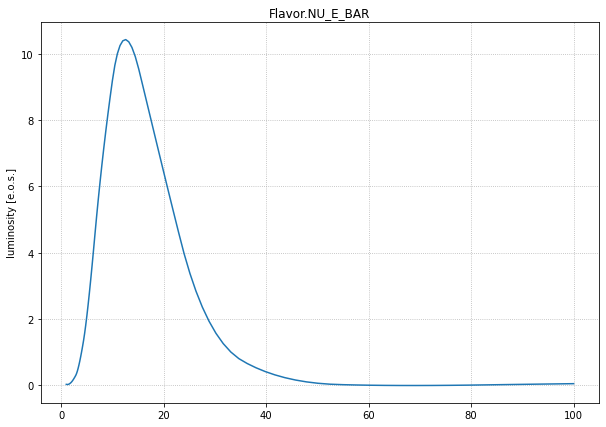

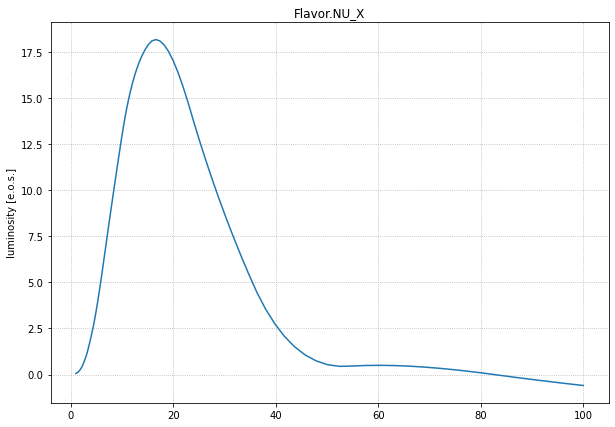

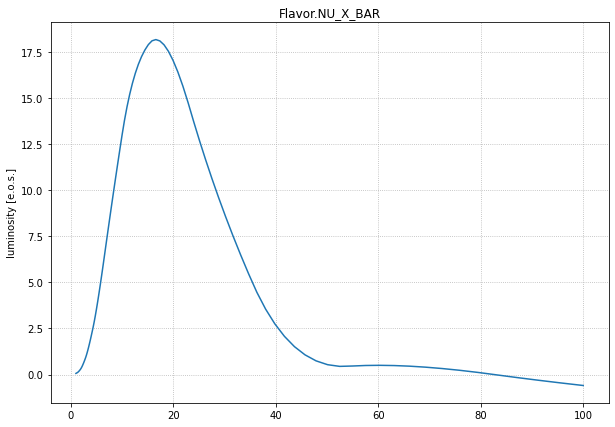

In [4]:
j = 40

E = np.logspace(0,2,101)

for flavor in Flavor:
    t = model.time

    L = model.get_initialspectra(j, E)[flavor.name]
    
    fig, ax = plt.subplots(1,1, figsize=(10,7))
    ax.plot(E, L)
    ax.set(title = flavor,
           ylabel='luminosity [e.o.s.]')
    ax.grid(ls=':')